# By Sushmitha
# The Spark Foundation
# Data Science and Business Analytics
# Task:1 Prediction using supervised learning



In [126]:
import pandas as pd


In [127]:
import numpy as np

In [128]:
import matplotlib.pyplot as plt

In [129]:
import os

In [130]:
os.getcwd()

'D:\\SUSHMITHA\\Dataframes_csvFiles'

In [131]:
#Enter the location of csv file 
os.chdir("D:\SUSHMITHA\Dataframes_csvFiles")

In [132]:
os.getcwd()

'D:\\SUSHMITHA\\Dataframes_csvFiles'

In [133]:
df=pd.read_csv('score_prediction.csv')

In [134]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [135]:
df.shape

(25, 2)

In [136]:
len(df)

25

In [137]:
df.isnull().any()

Hours     False
Scores    False
dtype: bool

In [138]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [139]:
df.ndim

2

In [140]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [141]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [142]:
#independent variable
x=df.iloc[:,0].values
x

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

In [143]:
#dependent variable
y=df.iloc[:,-1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Text(0, 0.5, 'scores')

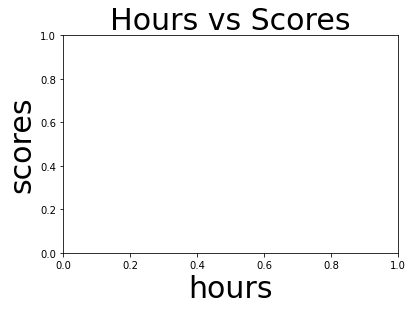

In [144]:
plt.title('Hours vs Scores',fontsize=30)
plt.xlabel('hours',fontsize=30)
plt.ylabel('scores',fontsize=30)

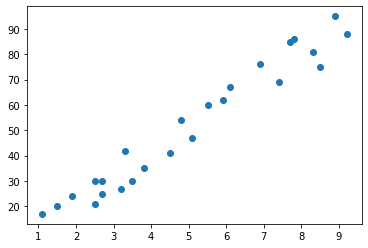

In [145]:
plt.scatter(df.Hours,df.Scores)

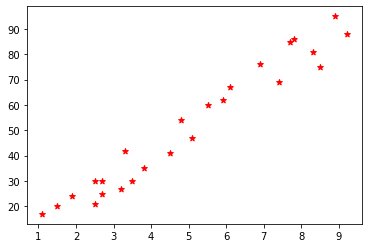

In [146]:

plt.scatter(df.Hours,df.Scores,color="red",marker='*')

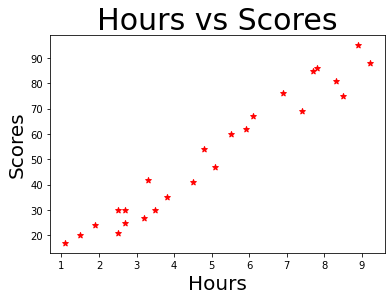

In [147]:
plt.title('Hours vs Scores',fontsize=30)
plt.xlabel('Hours',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.scatter(df.Hours,df.Scores,color="red",marker='*')
plt.show()

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X=df[['Hours']]
y=df.Scores

In [150]:
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [151]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [152]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [153]:
X_train

,Hours
10,7.7
18,6.1
19,7.4
4,3.5
2,3.2
20,2.7
6,9.2
7,5.5
22,3.8
1,5.1


In [154]:
len(X_train)

20

In [155]:
X_test

,Hours
14,1.1
13,3.3
17,1.9
3,8.5
21,4.8


In [156]:
len(X_test)

5

In [157]:
y_train

10    85
18    67
19    69
4     30
2     27
20    30
6     88
7     60
22    35
1     47
16    30
0     21
15    95
24    86
23    76
9     25
8     81
12    41
11    62
5     20
Name: Scores, dtype: int64

In [158]:
len(y_train)

20

In [159]:
y_test

14    17
13    42
17    24
3     75
21    54
Name: Scores, dtype: int64

In [160]:
len(y_test)

5

In [161]:
from sklearn import linear_model

In [162]:
model=linear_model.LinearRegression()

In [163]:
model.fit(X,df.Scores)

LinearRegression()

In [164]:
m=model.coef_

In [165]:
m

array([9.77580339])

In [166]:
c=model.intercept_

In [167]:
c

2.483673405373196

In [168]:
#y=m*x+c
y_calculated=m* 9.25 +c

In [169]:
y_calculated

array([92.90985477])

In [170]:
x1=df.iloc[0,:].values
y1 = df.iloc[:,1].values

x = x1.reshape(-1,1)
y = y1.reshape(-1,1)

In [171]:
y_pred=model.predict(X_test)
y_pred

array([13.23705714, 34.74382459, 21.05769985, 85.57800223, 49.40752968])

In [172]:
y_test

14    17
13    42
17    24
3     75
21    54
Name: Scores, dtype: int64

In [173]:
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1

,Actual,Predicted
14,17,13.237057
13,42,34.743825
17,24,21.057700
3,75,85.578002
21,54,49.407530


In [174]:
model.score(X_train,y_train)

0.9593972689350697

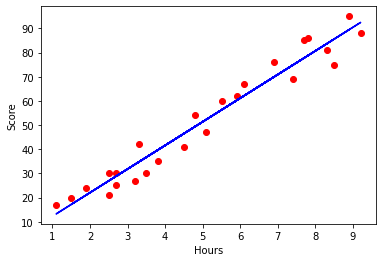

In [176]:
import matplotlib.pyplot as plt
plt.xlabel('Hours')
plt.ylabel('Score')
plt.scatter(df.Hours,df.Scores,color='red')
plt.plot(df.Hours,model.predict(df[['Hours']]),color='blue')

In [177]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

5.826378193566599

# Problem statement: what will be the predicted score if student studies for 9.25 hours

In [178]:
x1=np.array(9.25)
x1= x1.reshape(-1, 1)
pred = model.predict(x1)

In [179]:
pred

array([92.90985477])

In [180]:
print("if a Student studies for 9.25 hours , he is expected to score {}.".format(pred))

if a Student studies for 9.25 hours , he is expected to score [92.90985477].
